# Plot Data

In [ ]:
import os

# This function plot in box-plot format only the minimum voltage at each phase for different ev penetrations and certain PV penetration 
def three_phase_minv_bp_spec(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    all_data_phaseA = []
    all_data_phaseB = []
    all_data_phaseC = []

    # Loop through each day to extract the values
    for day in range(len(mc_results)):  # Assuming you have 30 days (day_0 to day_29)
        day_key = f'day_{day}'
        day_data = mc_results[day_key]['Min_PhaseA']['vm_a_pu']
        all_data_phaseA.extend(day_data)  # Add all values to a single list
        day_data = mc_results[day_key]['Min_PhaseB']['vm_b_pu']
        all_data_phaseB.extend(day_data)  # Add all values to a single list
        day_data = mc_results[day_key]['Min_PhaseC']['vm_c_pu']
        
        all_data_phaseC.extend(day_data)  # Add all values to a single list
        
    combined_data = [all_data_phaseA, all_data_phaseB, all_data_phaseC]
    # Create the box plot
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        # print()  # Blank line for better readability
        
    plt.boxplot(combined_data, vert=False)  # Set vert=False for horizontal boxplot

    # plt.title(title_text)
    plt.ylabel('Minimum Voltage Values')
    plt.yticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    return

In [ ]:
import os

# This function plot in box-plot format only the minimum voltage at each phase for different ev penetrations and certain PV penetration 
def three_phase_maxv_bp_spec(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    all_data_phaseA = []
    all_data_phaseB = []
    all_data_phaseC = []

    # Loop through each day to extract the values
    for day in range(len(mc_results)):  # Assuming you have 30 days (day_0 to day_29)
        day_key = f'day_{day}'
        day_data = mc_results[day_key]['Max_PhaseA']['vm_a_pu']
        all_data_phaseA.extend(day_data)  # Add all values to a single list
        day_data = mc_results[day_key]['Max_PhaseB']['vm_b_pu']
        all_data_phaseB.extend(day_data)  # Add all values to a single list
        day_data = mc_results[day_key]['Max_PhaseC']['vm_c_pu']
        
        all_data_phaseC.extend(day_data)  # Add all values to a single list
        
    combined_data = [all_data_phaseA, all_data_phaseB, all_data_phaseC]
    # Create the box plot
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        # print()  # Blank line for better readability
        
    plt.boxplot(combined_data, vert=False)  # Set vert=False for horizontal boxplot

    # plt.title(title_text)
    plt.ylabel('Maximum Voltage Values')
    plt.yticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    return

In [ ]:
def min_voltage_bp_general(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results:
        mc = mc_results[k]
        for n in mc:
            monte_carlo = mc[n]
            all_data =[]
            for day in range(len(monte_carlo)):  # Assuming you have 30 days (day_0 to day_29)
                day_key = f'day_{day}'
                monte_carlo_day = monte_carlo[day_key]['bus_results']
                for time in monte_carlo_day:
                    v_eval = monte_carlo_day[time].loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu']]
                    # Calculate the average voltage per row
                    V_avg = v_eval.mean(axis=1)
                    V_min = (V_avg).min()
                    all_data.append(V_min)  # Add all values to a single list
            combined_data.append(all_data)
                
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        
        # Filtering the extreme outliers 
        
        # # Calculate mean and standard deviation
        # mean = np.mean(data)
        # std_dev = np.std(data)

        # # Calculate z-scores
        # z_scores = [(x - mean) / std_dev for x in data]
        
        # # Filter data values with a z-score less than 3
        # data = [x for x, z in zip(data, z_scores) if abs(z) < 3.2]
        # data = np.array(data)
        
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        
        plt.boxplot(data, positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    plt.axhline(y=0.95, color='red', linestyle='--', linewidth=1)
    # plt.title(title_text)
    plt.ylabel('Voltage (p.u.)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='lower left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    
    return

In [ ]:
def max_voltage_bp_general(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results:
        mc = mc_results[k]
        for n in mc:
            monte_carlo = mc[n]
            all_data =[]
            for day in range(len(monte_carlo)):  # Assuming you have 30 days (day_0 to day_29)
                day_key = f'day_{day}'
                monte_carlo_day = monte_carlo[day_key]['bus_results']
                for time in monte_carlo_day:
                    v_eval = monte_carlo_day[time].loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu']]
                    # Calculate the average voltage per row
                    V_avg = v_eval.mean(axis=1)
                    V_max = (V_avg).max()
                    all_data.append(V_max)  # Add all values to a single list
            combined_data.append(all_data)
                
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        
        # Filtering the extreme outliers 
        
        # # Calculate mean and standard deviation
        # mean = np.mean(data)
        # std_dev = np.std(data)

        # # Calculate z-scores
        # z_scores = [(x - mean) / std_dev for x in data]
        
        # # Filter data values with a z-score less than 3
        # data = [x for x, z in zip(data, z_scores) if abs(z) < 3.2]
        # data = np.array(data)
        
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        
        plt.boxplot(data, positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    plt.axhline(y=1.05, color='red', linestyle='--', linewidth=1)
    # plt.title(title_text)
    plt.ylabel('Voltage (p.u.)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='lower left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    
    return

In [ ]:
def transformer_loading_bp(mc_results,ev_pen,title_text):
    results = {}
    for EV_perc in ev_pen:
        # Initialize an empty list to hold data for each day
        all_data = []
        ev_perc_title = f"monte_carlo_results_ev_{EV_perc}"
        # Loop through each day to extract the values
        for day in range(len(mc_results[ev_perc_title])):  # Assuming you have 30 days (day_0 to day_29)
            day_key = f'day_{day}'
            day_data = mc_results[ev_perc_title][day_key]['Transformer']['loading_percent']
            all_data.extend(day_data)  # Add all values to a single list
        results[ev_perc_title] = all_data
    plot=[]
    for EV_perc in ev_pen:
        ev_perc_title = f"monte_carlo_results_ev_{EV_perc}"
        plot.append(results[ev_perc_title])
    # Create the box plot
    ev_perc_title = f"monte_carlo_results_ev_{EV_perc}"
    
    for i in range(len(plot)):
        # Calculate statistics
        data = np.array(plot[i])
        
        median = np.median(data)
        mean = np.mean(data)
        
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Average: {mean:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        
    plt.boxplot(plot)
    # plt.boxplot(results)

    # plt.title(title_text)
    # plt.ylabel('Minimum Voltage Values')
    # plt.xticks(ev_pen)  # Label for the single box
    plt.xticks(range(1, len(ev_pen) + 1), [f"{int(perc*100)}%" for perc in ev_pen])
    # plt.tight_layout()  # Adjust layout for better readability
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return


In [ ]:
# This function plot in box-plot format only the minimum vodltage at each phase for different penetrations 
def transformer_loading_bp2(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results:
        mc = mc_results[k]
        for k in mc:
            monte_carlo = mc[k]
            all_data =[]
            for day in range(len(monte_carlo)):  # Assuming you have 30 days (day_0 to day_29)
                day_key = f'day_{day}'
                day_data = monte_carlo[day_key]['Transformer']['loading_percent']
                all_data.extend(day_data)  # Add all values to a single list
            combined_data.append(all_data)
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    # Loop through combined data to calculate statistics and plot
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        
        median = np.median(data)
        Average = np.mean(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.2f}")
        print(f"  Mean: {Average:.2f}")
        print(f"  Lower box-plot: {q1:.2f}")
        print(f"  Upper box-plot: {q3:.2f}")
        print(f"  Lower Whisker: {lower_whisker:.2f}")
        print(f"  Upper Whisker: {upper_whisker:.2f}")
        # print()  # Blank line for better readability
        
        plt.boxplot(data, positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    
    # plt.title(title_text)
    plt.ylabel('Transformer Loading (%)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='upper left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return

In [ ]:
# This function plot in box-plot format only the minimum vodltage at each phase for different penetrations 
def max_transformer_loading_bp2(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results:
        mc = mc_results[k]
        for k in mc:
            monte_carlo = mc[k]
            all_data =[]
            for day in range(len(monte_carlo)):  # Assuming you have 30 days (day_0 to day_29)
                day_key = f'day_{day}'
                day_data = monte_carlo[day_key]['Transformer']['loading_percent']
                max_val=np.max(day_data)
                all_data.append(max_val)  # Add all values to a single list
            combined_data.append(all_data)
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    # Loop through combined data to calculate statistics and plot
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        
        # # Calculate mean and standard deviation
        # mean = np.mean(data)
        # std_dev = np.std(data)

        # # Calculate z-scores
        # z_scores = [(x - mean) / std_dev for x in data]
        
        # # Filter data values with a z-score less than 3
        # data = [x for x, z in zip(data, z_scores) if abs(z) < 3.2]
        # data = np.array(data)
        
        median = np.median(data)
        mean = np.mean(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.2f}")
        print(f"  Mean: {mean:.2f}")
        print(f"  Lower box-plot: {q1:.2f}")
        print(f"  Upper box-plot: {q3:.2f}")
        print(f"  Lower Whisker: {lower_whisker:.2f}")
        print(f"  Upper Whisker: {upper_whisker:.2f}")
        # print()  # Blank line for better readability
        
        plt.boxplot(data, positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    
    # plt.title(title_text)
    plt.ylabel('Transformer Loading (%)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='upper left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return

In [ ]:
### Currently out of use 

# def transformer_loading_bp3(mc_results,ev_pen,title_text):
#     results = {}
#     for EV_perc in ev_pen:
#         # Initialize an empty list to hold data for each day
#         all_data = []
#         ev_perc_title = f"monte_carlo_results_{EV_perc}"
#         # Loop through each day to extract the values
#         for day in range(len(mc_results[ev_perc_title])):  # Assuming you have 30 days (day_0 to day_29)
#             day_key = f'day_{day}'
#             day_data = mc_results[ev_perc_title][day_key]['Transformer']['loading_percent']
#             all_data.extend(day_data)  # Add all values to a single list
#         results[ev_perc_title] = all_data
#     plot=[]
#     for EV_perc in ev_pen:
#         ev_perc_title = f"monte_carlo_results_{EV_perc}"
#         plot.append(results[ev_perc_title])
#     # Create the box plot
#     ev_perc_title = f"monte_carlo_results_{EV_perc}"
    
#     # Create the box plot
#     colors = ['red', 'blue', 'green', 'black', 'yellow', 'grey']
#     for i in range(len(plot)):
#         plt.boxplot(plot[i], positions=[i + 1], boxprops=dict(color=colors[i]), vert=False)
        
#     # plt.boxplot(plot, vert=False)
#     # plt.boxplot(results)

#     plt.title(title_text)
#     # plt.ylabel('Minimum Voltage Values')
#     # plt.xticks(ev_pen)  # Label for the single box
#     plt.yticks(range(1, len(ev_pen) + 1), [f"{int(perc*100)}%" for perc in ev_pen])
#     # plt.tight_layout()  # Adjust layout for better readability
#     plt.show()
    
#     return


In [ ]:
# This function plot in box-plot format only the minimum vodltage at each phase for different penetrations 
def line_loading_bp2(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results: # For each PV pnetration
        mc = mc_results[k]
        for l in mc: # For each EV penetration
            monte_carlo = mc[l]
            all_data =[]
            for day in range(len(monte_carlo)):  # Run througn all iterations
                day_key = f'day_{day}'
                day_data = monte_carlo[day_key]['Lines']['loading_percent']
                all_data.extend(day_data)  # Add all values to a single list
            combined_data.append(all_data)
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        
        # # Calculate mean and standard deviation
        # mean = np.mean(data)
        # std_dev = np.std(data)

        # # Calculate z-scores
        # z_scores = [(x - mean) / std_dev for x in data]
        
        # # Filter data values with a z-score less than 3
        # data = [x for x, z in zip(data, z_scores) if abs(z) < 3]
        # data = np.array(data)
        
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")

        plt.boxplot(combined_data[i], positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    
    # plt.title(title_text)
    plt.ylabel('Line Loading (%)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='upper left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return

In [ ]:
# This function plot in box-plot format only the minimum vodltage at each phase for different penetrations 
def max_line_loading_bp2(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results: # For each PV pnetration
        mc = mc_results[k]
        for l in mc: # For each EV penetration
            monte_carlo = mc[l]
            all_data =[]
            for day in range(len(monte_carlo)):  # Run througn all iterations
                day_key = f'day_{day}'
                day_data = monte_carlo[day_key]['Lines']['loading_percent']
                max_val=np.max(day_data)
                all_data.append(max_val)  # Add all values to a single list
            combined_data.append(all_data)
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        
        # # Calculate mean and standard deviation
        # mean = np.mean(data)
        # std_dev = np.std(data)

        # # Calculate z-scores
        # z_scores = [(x - mean) / std_dev for x in data]
        
        # # Filter data values with a z-score less than 3
        # data = [x for x, z in zip(data, z_scores) if abs(z) < 3]
        # data = np.array(data)
        
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")

        plt.boxplot(combined_data[i], positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    
    # plt.title(title_text)
    plt.ylabel('Line Loading (%)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='upper left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return

In [ ]:
def transformer_loading_time_interval_boxplot(mc_results, title_text):
    num_intervals  = len(mc_results['day_0']['Transformer'])
    # Initialize a dictionary to hold data for each time interval across all days
    time_intervals_data = {i: [] for i in range(num_intervals)}  # Assuming 48 intervals (30-minute intervals)

    # Loop through each day to extract the values for each time interval
    for day in range(len(mc_results)):
        day_key = f'day_{day}'
        day_data = mc_results[day_key]['Transformer']['loading_percent']

        # Loop through each time interval in the day
        for i in range(num_intervals):
            time_intervals_data[i].append(day_data.iloc[i])  # Assuming `mc_results[day_key]` is a DataFrame with time intervals as index

    # Prepare the data for box plotting
    combined_data = [time_intervals_data[i] for i in range(num_intervals)]  # List of lists for each time interval
    time_labels = [f'{hour:02d}:{minute:02d}' for hour in range(24) for minute in [0]]  # 30-minute intervals (00:00, 00:30, ...)
    # Create the box plot
    plt.figure(figsize=(6, 3))
    
    plt.boxplot(combined_data)
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
    
    # plt.title(title_text)
    plt.ylabel('Loading Percentage (%)')
    plt.xlabel('Time (hh-mm)')
    plt.xticks(range(1, num_intervals + 1,2), time_labels, rotation=90)    
    # Add legend and adjust layout
    # plt.legend()
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return


In [ ]:
def ev_loading_time_interval_boxplot(mc_results, title_text):
    num_intervals  = len(mc_results['day_0']['F1_EV_Profile'])
    # Initialize a dictionary to hold data for each time interval across all days
    time_intervals_data = {i: [] for i in range(num_intervals)}  # Assuming 48 intervals (30-minute intervals)

    # Loop through each day to extract the values for each time interval
    for day in mc_results:
        day_data = mc_results[day]['F1_EV_Profile'].sum(axis=1) + mc_results[day]['F2_EV_Profile'].sum(axis=1) + mc_results[day]['F3_EV_Profile'].sum(axis=1)

        # Loop through each time interval in the day
        for i in range(num_intervals):
            # print(day_data)
            time_intervals_data[i].append(day_data.iloc[i])  # Assuming `mc_results[day_key]` is a DataFrame with time intervals as index

    # Prepare the data for box plotting
    combined_data = [time_intervals_data[i] for i in range(num_intervals)]  # List of lists for each time interval
    
    time_labels = [f'{hour:02d}:{minute:02d}' for hour in range(24) for minute in [0, 30]]  # 30-minute intervals (00:00, 00:30, ...)
    # Create the box plot
    plt.figure(figsize=(12, 6))
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        
    plt.boxplot(combined_data)
    
    # plt.title(title_text)
    plt.ylabel('Values per Time Interval')
    plt.xlabel('30-Minute Time Intervals')
    plt.xticks(range(1, num_intervals + 1), time_labels, rotation=90)    
    # Add legend and adjust layout
    # plt.legend()
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return


In [ ]:
def max_unbalance_voltage_bp2(mc_results,title_text):
    
    # Initialize an empty list to hold data for each day
    combined_data = []
    
    # Loop through each day to extract the values
    for k in mc_results:
        mc = mc_results[k]
        for n in mc:
            monte_carlo = mc[n]
            all_data =[]
            for day in range(len(monte_carlo)):  # Assuming you have 30 days (day_0 to day_29)
                day_key = f'day_{day}'
                monte_carlo_day = monte_carlo[day_key]['bus_results']
                for time in monte_carlo_day:
                    v_eval = monte_carlo_day[time].loc[0:63, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu']]
                    # Calculate the average voltage per row
                    V_avg = v_eval.mean(axis=1)

                    # Calculate the squared deviations for each phase
                    squared_diff = (v_eval.sub(V_avg, axis=0) ** 2).sum(axis=1)

                    # Calculate the VUF
                    VUF = ((np.sqrt(squared_diff) / V_avg) * 100).max()
                    all_data.append(VUF)  # Add all values to a single list
            combined_data.append(all_data)
                
    plt.figure(figsize=(6, 3))
    # Create the box plot
    # plt.boxplot(combined_data)
    colors = ['red', 'blue', 'green', 'brown', 'black']   # Repeat the pattern for a total of 9 boxplots
    
    for i in range(len(combined_data)):
        # Calculate statistics
        data = np.array(combined_data[i])
        median = np.median(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
         # Calculate lower and upper whisker limits
        lower_whisker_limit = q1 - 1.5 * iqr
        upper_whisker_limit = q3 + 1.5 * iqr
        
        # Identify lower and upper whisker
        lower_whisker = np.min(data[data >= lower_whisker_limit]) if np.any(data >= lower_whisker_limit) else np.min(data)
        upper_whisker = np.max(data[data <= upper_whisker_limit]) if np.any(data <= upper_whisker_limit) else np.max(data)
            
        # Print the values
        print(f"  Median: {median:.3f}")
        print(f"  Lower box-plot: {q1:.3f}")
        print(f"  Upper box-plot: {q3:.3f}")
        print(f"  Lower Whisker: {lower_whisker:.3f}")
        print(f"  Upper Whisker: {upper_whisker:.3f}")
        
        plt.boxplot(combined_data[i], positions=[i + 1], boxprops=dict(color=colors[i%5]), widths=0.5)
        
    # plt.boxplot(combined_data, vert=True)  # Set vert=False for horizontal boxplot
    
    # plt.title(title_text)
    plt.ylabel('Maximum Unbalance Voltage (%)')
    
    # Create labels with every third showing "EV_x%"
    labels1 = []
    labels2 = []
    for i in range(len(combined_data)):  # Adjust the range if you have a different number of boxplots
        labels1.append(i+1)
        if i % 5 == 2:
            labels2.append(f'PV_{((i//5)+1) * 20}%')  # EV_0%, EV_20%, EV_40%, ...
        else:
            labels2.append('')  # Leave empty for non-group labels
        
    
    # Set custom x-axis labels
    plt.xticks(labels1, labels2)
    
    # Add vertical lines to separate groups
    for sep in range(5, len(labels1), 5):
        plt.axvline(sep + 0.5, color='grey', linestyle='--', linewidth=0.8)  # Adjust line color and style as desired

    # Add legend
    labels = ['0%', '20%', '40%', '60%', '80%']
    handles = [plt.Line2D([0], [0], color='red', lw=2),
           plt.Line2D([0], [0], color='blue', lw=2),
           plt.Line2D([0], [0], color='green', lw=2),
           plt.Line2D([0], [0], color='brown', lw=2),
           plt.Line2D([0], [0], color='black', lw=2)]
    plt.legend(handles, labels, loc='upper left', fontsize=8, title='EV Penetration', title_fontsize=6)

    # plt.xticks([1,2,3], ['Phase A','Phase B','Phase C'])  # Label for the single box
    plt.tight_layout()  # Adjust layout for better readability
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return

In [ ]:
import re
def mean_ev_and_trans_loading_time_interval_lineplot(mc_results,load_profile, title_text):
    # fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 6))
    fig1, ax1 = plt.subplots(figsize=(7, 3))
    # Create a secondary y-axis for ax1
    ax1_secondary = ax1.twinx()
    
    for k in mc_results['monte_carlo_results_pv_0.2']:
        mc=mc_results['monte_carlo_results_pv_0.2'][k]
        num_intervals  = len(mc['day_0']['F1_EV_Profile'])
        # Initialize a dictionary to hold data for each time interval across all days
        time_intervals_data = {i: [] for i in range(num_intervals)}  # Assuming 48 intervals (30-minute intervals)

        # Loop through each day to extract the values for each time interval
        for day in mc:
            day_data = mc[day]['F1_EV_Profile'].sum(axis=1) + mc[day]['F2_EV_Profile'].sum(axis=1) + mc[day]['F3_EV_Profile'].sum(axis=1)
            # Loop through each time interval in the day
            for i in range(num_intervals):
                # print(day_data)
                time_intervals_data[i].append(day_data.iloc[i])  # Assuming `mc_results[day_key]` is a DataFrame with time intervals as index
        test = [(np.mean(time_intervals_data[values])) for values in time_intervals_data]
        ax1.plot(test, label=str(int(''.join(filter(str.isdigit, k)))*10)+'%')
        # Find the x value corresponding to the highest y value
        max_y_index = np.argmax(test)  # Index of the highest y value
        x_constant = max_y_index  # x-value at the highest y

        # Add a vertical line at x = x_constant
    ax1.axvline(x=36, color='red', linestyle='--')

    ax1_secondary.plot(load_profile.values, color='blue', label='Basic Load Profile')
    ax1_secondary.set_ylabel('Basic Load Power (KW)', color='blue')
    # Create a second y-axis
    fig2, ax2 = plt.subplots(figsize=(7, 3))
    for k in mc_results:
        mc=mc_results[k]
        for n in mc:
            monte_carlo = mc[n]
            num_intervals  = len(monte_carlo['day_0']['F1_EV_Profile'])
            # Initialize a dictionary to hold data for each time interval across all days
            time_intervals_data = {i: [] for i in range(num_intervals)}  # Assuming 48 intervals (30-minute intervals)

            # Loop through each day to extract the values for each time interval
            for day in monte_carlo:
                day_data = monte_carlo[day]['Transformer']['loading_percent']
                # Loop through each time interval in the day
                for i in range(num_intervals):
                    # print(day_data)
                    time_intervals_data[i].append(day_data.iloc[i])  # Assuming `mc_results[day_key]` is a DataFrame with time intervals as index
            test = [(np.mean(time_intervals_data[values])) for values in time_intervals_data]
            ax2.plot(test, label=str(int(''.join(filter(str.isdigit, k)))*10) + str(',') + str(int(''.join(filter(str.isdigit, n)))*10) )
    # Plot the second dataset on the second y-axis
    
    ax2.set_ylabel('Transformer Loading (%)')
    ax2.axvline(x=32, color='red', linestyle='--')
    ax2.axvline(x=40, color='red', linestyle='--')
    time_labels = [f'{hour:02d}:{minute:02d}' for hour in range(24) for minute in [0]]  # 30-minute intervals (00:00, 00:30, ...)
    # fig.suptitle(title_text)
    ax1.set_ylabel('EV Average Power (kW)')
    # Assuming num_intervals and time_labels are defined correctly
    ax1.set_xticks(range(0, num_intervals, 2))  # Set the x-ticks
    ax1.set_xticklabels(time_labels, rotation=45)  # Set the x-tick labels with rotation
    
    ax2.set_xticks(range(0, num_intervals, 2))  # Set the x-ticks
    ax2.set_xticklabels(time_labels, rotation=45)  # Set the x-tick labels with rotation
    
    

    # Add legend and adjust layout
    ax1.legend(loc='upper left', title='EV',fontsize=9, ncol=2)
    ax1_secondary.legend(loc='upper center', fontsize=9)
    ax2.legend(loc='upper left', title='PV(%),EV(%)', fontsize=9,ncol=3)
    # plt.tight_layout()
    # plt.suptitle('Two Subplots with Shared X-Axis')
    
    save_path = os.path.join('Plot_Photos', f"{title_text}.png")
    save_path1 = os.path.join('Plot_Photos', f"transformer_loading.png")
    
    fig1.savefig(save_path, dpi=300, bbox_inches='tight')
    fig2.savefig(save_path1, dpi=300, bbox_inches='tight')
    plt.show()
    
    return


In [ ]:
#################### ---------------- Grouping buses based on Distance ---------------------------- #################################
def  group_buses_results_by_distance(net):
    F1_lines=net.line[net.bus['name'][net.line['to_bus']].str.contains('F1', na=False).values]
    F2_lines=net.line[net.bus['name'][net.line['to_bus']].str.contains('F2', na=False).values]
    F3_lines=net.line[net.bus['name'][net.line['to_bus']].str.contains('F3', na=False).values]

    import networkx as nx
    from collections import defaultdict

    # Create a graph
    G = nx.Graph()
    GF1 = nx.Graph()
    GF2 = nx.Graph()
    GF3 = nx.Graph()
    

    # Add edges (lines) with distances (length_km)
    for _, row in net.line.iterrows():
        G.add_edge(row['from_bus'], row['to_bus'], weight=row['length_km'])

    # Add edges (lines) with distances (length_km)
    for _, row in F1_lines.iterrows():
        GF1.add_edge(row['from_bus'], row['to_bus'], weight=row['length_km'])

    # Add edges (lines) with distances (length_km)
    for _, row in F2_lines.iterrows():
        GF2.add_edge(row['from_bus'], row['to_bus'], weight=row['length_km'])

    # Add edges (lines) with distances (length_km)
    for _, row in F3_lines.iterrows():
        GF3.add_edge(row['from_bus'], row['to_bus'], weight=row['length_km'])


    # Calculate shortest path distance from reference bus (bus 1)
    reference_bus = 1
    distances = nx.single_source_dijkstra_path_length(G, reference_bus, weight='weight')
    distancesF1 = nx.single_source_dijkstra_path_length(GF1, reference_bus, weight='weight')
    distancesF2 = nx.single_source_dijkstra_path_length(GF2, reference_bus, weight='weight')
    distancesF3 = nx.single_source_dijkstra_path_length(GF3, reference_bus, weight='weight')
    
    # Round distances to 3 decimal places using NumPy
    rounded_distances = {k: np.round(v, 3) for k, v in distances.items()}
    rounded_distancesF1= {k: np.round(v, 3) for k, v in distancesF1.items()}
    rounded_distancesF2= {k: np.round(v, 3) for k, v in distancesF2.items()}
    rounded_distancesF3= {k: np.round(v, 3) for k, v in distancesF3.items()}
    
    # Group buses by their rounded distances using defaultdict
    grouped_buses = defaultdict(list)
    grouped_busesF1 = defaultdict(list)
    grouped_busesF2 = defaultdict(list)
    grouped_busesF3 = defaultdict(list)
    
    for bus, distance in rounded_distances.items():
        grouped_buses[distance].append(bus)

    for bus, distance in rounded_distancesF1.items():
        grouped_busesF1[distance].append(bus)
    
    for bus, distance in rounded_distancesF2.items():
        grouped_busesF2[distance].append(bus)
    
    for bus, distance in rounded_distancesF3.items():
        grouped_busesF3[distance].append(bus)
    
    # Convert the grouped_buses to a regular dictionary for display
    grouped_buses_dict = dict(grouped_buses)

    # Convert the grouped_buses to a regular dictionary for display
    grouped_buses_dictF1 = dict(grouped_busesF1)

    # Convert the grouped_buses to a regular dictionary for display
    grouped_buses_dictF2 = dict(grouped_busesF2)

    # Convert the grouped_buses to a regular dictionary for display
    grouped_buses_dictF3 = dict(grouped_busesF3)
        
    # Display the grouped buses
    # print(grouped_buses_dict.keys())
    # print(grouped_buses_dict)
    
    
    return grouped_buses_dict, grouped_buses_dictF1, grouped_buses_dictF2, grouped_buses_dictF3

In [ ]:
def distance_voltage_bp(mc_results,title_text,group_bus):
    
    # Initialize an empty list for each key in the groups
    grouped_values_phaseA = {key: [] for key in group_bus.keys()}
    grouped_values_phaseB = {key: [] for key in group_bus.keys()}
    grouped_values_phaseC = {key: [] for key in group_bus.keys()}
    
    # Loop through each day to extract the values
    for day in range(len(mc_results)):  # Assuming you have 30 days (day_0 to day_29)
        day_key = f'day_{day}'
        for time in range(len(mc_results[day_key]['bus_results'])):
            for bus in range(len(mc_results[day_key]['bus_results'][time])):
                for k,v in group_bus.items():
                    if bus in v:
                        grouped_values_phaseA[k].append(mc_results[day_key]['bus_results'][time].loc[bus,'vm_a_pu'])
                        grouped_values_phaseB[k].append(mc_results[day_key]['bus_results'][time].loc[bus,'vm_b_pu'])
                        grouped_values_phaseC[k].append(mc_results[day_key]['bus_results'][time].loc[bus,'vm_c_pu'])
                        
    combined_data_PhaseA = [grouped_values_phaseA[key] for key in group_bus.keys()]  # List of lists for each time interval
    combined_data_PhaseB = [grouped_values_phaseB[key] for key in group_bus.keys()]  # List of lists for each time interval
    combined_data_PhaseC = [grouped_values_phaseC[key] for key in group_bus.keys()]  # List of lists for each time interval
    
    # For multi-Phase in same plot ---------------------------
    
    # combined_data = []
    # for k,v in group_bus.items():
    #     combined_data.append([
    #     grouped_values_phaseA[k],  # Boxplot for Phase A at this time point
    #     grouped_values_phaseB[k],  # Boxplot for Phase B at this time point
    #     grouped_values_phaseC[k]   # Boxplot for Phase C at this time point
    # ])
    # print(combined_data)
    
    # Flatten the combined_data for boxplot
    # flattened_data = [item for sublist in combined_data for item in sublist]
    
    # Create the boxplot
    # plt.figure(figsize=(80, 40))
    # boxplots = plt.boxplot(flattened_data, positions=np.arange(1, len(flattened_data) + 1), patch_artist=True)
    
    # # Define colors for each boxplot
    # colors = ['lightblue', 'lightgreen', 'lightcoral']

    # # Apply colors to each boxplot
    # for i, patch in enumerate(boxplots['boxes']):
    #     patch.set_facecolor(colors[i % len(colors)])
        
    ################# ------------------- Multi-Phase Plot in same figure
    
    plt.figure(figsize=(12, 6))
    # plt.boxplot(combined_data_PhaseA,patch_artist=True)
    plt.boxplot(combined_data_PhaseA)
    # patch.set_facecolor('lightblue')
    
    # Define custom x-axis ticks and labels (0 to 200 with a step of 10)
    custom_ticks = list(range(0, int(list(group_bus.keys())[-1]*1000), 10))  # This creates 21 labels: 0, 10, 20, ..., 200

    # Define the positions for the x-axis (1 to 98 for the boxplots)
    num_boxplots = len(combined_data_PhaseA)
    # Calculate positions for custom ticks based on the number of boxplots
    # We want to set custom ticks only at certain positions, not for every boxplot.
    # We can evenly distribute the ticks across the boxplot positions.
    tick_positions = [round(i * num_boxplots / len(custom_ticks)) for i in range(len(custom_ticks))]
    
    # Set the x-axis ticks and corresponding labels
    plt.xticks(ticks=tick_positions, labels=custom_ticks)
    
    # plt.xticks(range(1, num_boxes + 1, 5),rotation=90)  # Setting ticks at intervals of 10
    plt.title(title_text)
    plt.ylabel('Voltage')
    plt.xlabel('Distance from Distribution Transformer')    
    # plt.xticks(range(1, num_intervals + 1), time_labels, rotation=90)    
    # Add legend and adjust layout
    plt.legend()
    plt.tight_layout()  # Adjust layout for better readability
    plt.show()
    
    return 

In [ ]:
def distance_voltage_lineplot(mc_results,title_text,group_bus):
    # group_bus=group_bus[0]
    # plt.figure(fisize=(6, 3))
    EV=[0,60]
    i=1
    for group in group_bus:
        Feeder_Name = f'Feeder {i}'
        i=i+1   
        # Initialize an empty list for each key in the groups
        grouped_values = {key: [] for key in group.keys()}
    
        # Loop through each day to extract the values
        EV_I=-1
        for monte_carlo_results in mc_results:
            EV_I=EV_I+1
            EV_PERC=EV[EV_I]
            grouped_values = {key: [] for key in group.keys()}
            grouped_values_test = {key: [] for key in group.keys()}
            
            for day in range(len(monte_carlo_results)):  # Assuming you have 30 days (day_0 to day_29)
                day_key = f'day_{day}'
                for time in range(len(monte_carlo_results[day_key]['bus_results'])):
                    time_values={key: [] for key in group.keys()}
                    for bus in range(len(monte_carlo_results[day_key]['bus_results'][time])):
                        for k,v in group.items():
                            if bus in v:
                                values = [
                                monte_carlo_results[day_key]['bus_results'][time].loc[bus, 'vm_a_pu'],
                                monte_carlo_results[day_key]['bus_results'][time].loc[bus, 'vm_b_pu'],
                                monte_carlo_results[day_key]['bus_results'][time].loc[bus, 'vm_c_pu']
                                ]
                                Average = sum(values) / len(values)  # or use np.mean(values) if you have NumPy imported
                                grouped_values[k].append(Average)
                                time_values[k].append(Average)
                    for key in group.keys():
                        grouped_values_test[key].append(np.min(time_values[key]))
            
            combined_data = [grouped_values[key] for key in group.keys()]  # List of lists for each time interval
            combined_mean_data = [np.mean(dataset) for dataset in combined_data]
            # Original non-uniform x-axis values (scaled by 1000)
            x_original = np.array(list(group.keys())) * 1000
    
            # Define a new uniform x-axis range (e.g., from 0 to max value with step 10)
            x_uniform = np.arange(0, x_original[-1] + 10, 10)
    
            # Interpolate y-values for the new uniform x-axis
            combined_mean_data_interpolated = np.interp(x_uniform, x_original, combined_mean_data)
    
            # plt.plot(combined_mean_data)
            plt.plot(x_uniform, combined_mean_data_interpolated, label=Feeder_Name + ' - ' + str(EV_PERC) +'%')
    # plt.boxplot(combined_data)

    plt.title(title_text)
    plt.ylabel('Voltage (p.u)')
    plt.xlabel('Distance (m)') 
    # plt.xticks(range(1, num_intervals + 1), time_labels, rotation=90)    
    # Add legend and adjust layout
    plt.legend(title='Feeder-EV',ncol=3, fontsize=6)
    plt.tight_layout()  # Adjust layout for better readability
    plt.show()
    
    
    # ax1.set_xticks(range(0, num_intervals, 2))  # Set the x-ticks
    # time_labels = [f'{hour:02d}:{minute:02d}' for hour in range(24) for minute in [0]]  # 30-minute intervals (00:00, 00:30, ...)
    # ax2.set_xticklabels(time_labels, rotation=90)  # Set the x-tick labels with rotation
    
    return 


# def max_unbalance_voltage_bp2(mc_results,title_text):
    
#     # Initialize an empty list to hold data for each day
#     combined_data = []
    
#     # Loop through each day to extract the values
#     for k in mc_results:
#         mc = mc_results[k]
#         for n in mc:
#             monte_carlo = mc[n]
#             all_data =[]
#             for day in range(len(monte_carlo)):  # Assuming you have 30 days (day_0 to day_29)
#                 day_key = f'day_{day}'
#                 monte_carlo_day = monte_carlo[day_key]['bus_results']
#                 for time in monte_carlo_day:
#                     v_eval = monte_carlo_day[time].loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu']]
#                     # Calculate the average voltage per row
#                     V_avg = v_eval.mean(axis=1)

#                     # Calculate the squared deviations for each phase
#                     squared_diff = (v_eval.sub(V_avg, axis=0) ** 2).sum(axis=1)

#                     # Calculate the VUF
#                     VUF = ((np.sqrt(squared_diff) / V_avg) * 100).max()
#                     all_data.append(VUF)  # Add all values to a single list
#             combined_data.append(all_data)
                

SyntaxError: '(' was never closed (1479806356.py, line 26)

C:\Users\savva\AppData\Local\Temp\ipykernel_5744\3900765824.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, y="Variation", x="Transformer peak load increase (%)", order=variation_order, palette="Set3", orient="h")


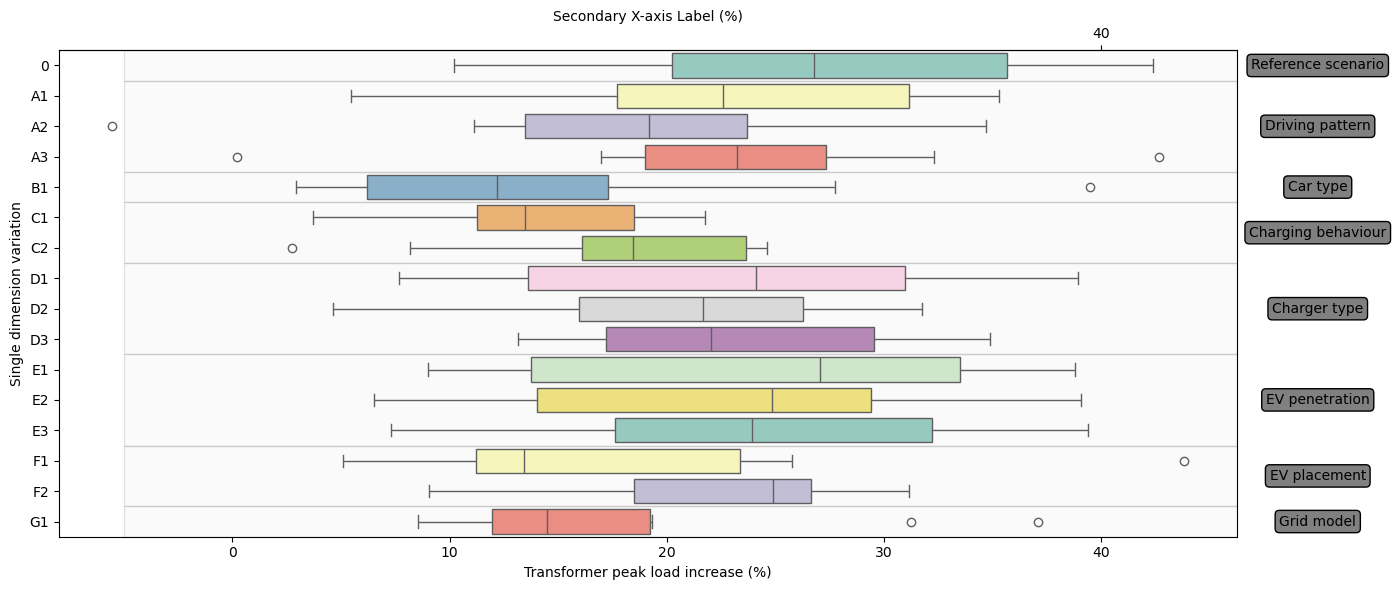

In [1]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# import matplotlib.patches as patches

# # Sample data generation (adjust with your actual data)
# np.random.seed(0)
# data = {
#     "Category": (
#         ["Reference scenario"] * 10 +
#         ["Driving pattern"] * 30 +
#         ["Car type"] * 10 +
#         ["Charging behaviour"] * 20 +
#         ["Charger type"] * 30 +
#         ["EV penetration"] * 30 +
#         ["EV placement"] * 20 +
#         ["Grid model"] * 10
#     ),
#     "Variation": (
#         ["0"] * 10 +
#         ["A1", "A2", "A3"] * 10 +
#         ["B1"] * 10 +
#         ["C1", "C2"] * 10 +
#         ["D1", "D2", "D3"] * 10 +
#         ["E1", "E2", "E3"] * 10 +
#         ["F1", "F2"] * 10 +
#         ["G1"] * 10
#     ),
#     "Transformer peak load increase (%)": np.random.normal(20, 10, 160)
# }

# # Convert to DataFrame
# df = pd.DataFrame(data)

# # Define the order of variations to match the layout
# variation_order = ["0", "A1", "A2", "A3", "B1", "C1", "C2", "D1", "D2", "D3", "E1", "E2", "E3", "F1", "F2", "G1"]

# # Set up the plot in landscape mode
# plt.figure(figsize=(14, 6))
# ax = sns.boxplot(data=df, y="Variation", x="Transformer peak load increase (%)", order=variation_order, palette="Set3", orient="h")

# # Set labels and title
# plt.xlabel("Transformer peak load increase (%)")
# plt.ylabel("Single dimension variation")

# # Define category positions for shading and centering labels
# # Each tuple is (start, end, label)
# category_ranges = [
#     (0, 0, "Reference scenario"),
#     (1, 3, "Driving pattern"),
#     (4, 4, "Car type"),
#     (5, 6, "Charging behaviour"),
#     (7, 9, "Charger type"),
#     (10, 12, "EV penetration"),
#     (13, 14, "EV placement"),
#     (15, 15, "Grid model")
# ]

# # Add shaded rectangular boxes for each category, dynamically adjusting the height
# for start, end, label in category_ranges:
#     # Calculate y-height for the rectangle
#     y_height = end - start + 1
#     # Create the rectangle patch with dynamic height based on y-label range
#     rect = patches.Rectangle((-5, start - 0.5), 105, y_height, linewidth=1, edgecolor='black', facecolor='lightgrey', alpha=0.1)
#     ax.add_patch(rect)

#     # Center the text within the shaded box
#     center_pos = (start + end) / 2
#     plt.text(50, center_pos, label, ha='center', va='center', fontsize=10, color="black",
#              bbox=dict(facecolor='grey', edgecolor='black', boxstyle="round,pad=0.3"), rotation=0)

# # Add a secondary x-axis with different scale
# secax = ax.secondary_xaxis('top')
# secax.set_xticks([40, 60, 80])  # Customize based on your data
# secax.set_xlabel("Secondary X-axis Label (%)")

# # Show the plot
# plt.tight_layout()
# plt.show()
